In [1]:
using Plots
using QuantumOptics
include("C:/Users/jonat/Desktop/Code/multimode/multiMode/Visual.jl")
include("C:/Users/jonat/Desktop/Code/multimode/multiMode/Qcrew.jl")
using .Qcrew
using BenchmarkTools

bc = Qcrew.bc
bq = Qcrew.bq

Spin(1/2)

## Single Cavity Mode

In [8]:
t_wait = [0:0.01:3;].*0.05e-6
t_pi = [0:0.1:3;].*1e-9
t_displace= [0:1:3;].*1e-9;

In [10]:
ϵ = 1/(2*maximum(t_displace)*sin(Qcrew.χ/2*maximum(t_wait)))
#ϵ*maximum(t_displace)

3.6711487743087775e8

In [3]:
ϵ_list = LinRange(0, 10, 50).*1/maximum(t_displace)

epsilon_1 = Qcrew.find_epsilon_1_for_ecd(ϵ_list, t_displace, t_wait, t_pi)
print(epsilon_1*maximum(t_displace))

0.6122448979591837

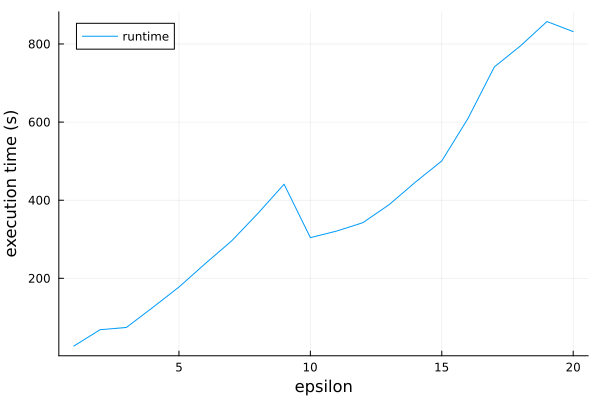

In [10]:
 # loss zero for now
a = Qcrew.Iq  ⊗ destroy(bc)
photon_loss_jump_op = Qcrew.photon_loss_cavity_jump_operator(1, a)
J = [photon_loss_jump_op] 
epsilon_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15, 16, 17, 18, 19, 20] 
# execute the gate
execution_times = []
for eps in epsilon_list
    runtime = @elapsed Qcrew.ECD_evolution_loss_test(eps/maximum(t_displace), t_displace, t_wait, t_pi, Qcrew.g_vac, J, π/2)
    push!(execution_times, runtime)
end

plot(epsilon_list, execution_times, xlabel="epsilon", ylabel="execution time (s)", label="runtime")

In [6]:
savefig("runtime500.png")

"c:\\Users\\jonat\\Desktop\\Code\\multimode\\twoModeSq\\runtime500.png"

In [9]:
execution_times

11-element Vector{Any}:
   57.2592149
   90.8495051
  212.997233
  349.956341
  508.1595508
  602.83511
  488.2389541
  580.3688924
  791.5404421
  853.9249845
 1301.9819153

In [9]:
using NPZ
npzwrite("ecd_runtime_with_500.npz", epsilon_list=epsilon_list, execution_times=execution_times)


ArgumentError: ArgumentError: cannot reinterpret `Any` as `UInt8`, type `Any` is not a bits type

In [11]:
for eps in epsilon_list
    print(typeof(eps))
end

Int64Int64Int64

In [22]:

# loss zero for now
a = Qcrew.Iq  ⊗ destroy(bc)
photon_loss_jump_op = Qcrew.photon_loss_cavity_jump_operator(1, a)
J = [photon_loss_jump_op] 
epsilon_list = [1, 2, 3] 
# execute the gate
execution_times = []
for eps in epsilon_list
    Qcrew.ECD_evolution_loss_test(1/maximum(t_displace), t_displace, t_wait, t_pi, Qcrew.g_vac, J, π/2)
end


In [19]:
execution_times

3-element Vector{Any}:
 1.4714074
 1.4176335
 1.4849309

## 2 Cavity Modes

In [39]:
# displacement amplitudes
ϵ = [1,1].*epsilon_1 
# loss zero for now
a = Qcrew.Iq  ⊗ destroy(bc) ⊗ destroy(bc)
photon_loss_jump_op = Qcrew.photon_loss_cavity_jump_operator(0, a)
J = [photon_loss_jump_op] 
# execute the gate
state = Qcrew.ECD_two_mode_evolution_loss(ϵ, t_displace, t_wait, t_pi, Qcrew.g_vac_vac, J, π/2)

In [26]:
destroy(bc) ⊗ destroy(bc)


Operator(dim=16x16)
  basis: [Fock(cutoff=3) ⊗ Fock(cutoff=3)]sparse([1, 2, 3, 5, 6, 7, 9, 10, 11], [6, 7, 8, 10, 11, 12, 14, 15, 16], ComplexF64[1.0 + 0.0im, 1.4142135623730951 + 0.0im, 1.7320508075688772 + 0.0im, 1.4142135623730951 + 0.0im, 2.0000000000000004 + 0.0im, 2.4494897427831783 + 0.0im, 1.7320508075688772 + 0.0im, 2.4494897427831783 + 0.0im, 2.9999999999999996 + 0.0im], 16, 16)

In [21]:
Qcrew.displacement_two_mode_evolution_loss([1,1].*cos(2/2*maximum(t_displace)), t_displace, Qcrew.g_vac_vac, J, [1,2])

Operator(dim=32x32)
  basis: [Spin(1/2) ⊗ Fock(cutoff=3) ⊗ Fock(cutoff=3)]
 0.0+0.0im      0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im   0.0+0.0im
 0.0+0.0im      1.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  -0.0+0.0im
 0.0+0.0im      0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im   0.0+0.0im
 0.0+0.0im      0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im   0.0+0.0im
 0.0+0.0im      0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im   0.0+0.0im
 0.0+0.0im  1.0e-17-0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  -0.0+0.0im
 0.0+0.0im      0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im   0.0+0.0im
 0.0+0.0im      0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im   0.0+0.0im
 0.0+0.0im      0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im   0.0+0.0im
 0.0+0.0im      0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im   0.0+0.0im
    ⋮                                 ⋱                ⋮       
 0.0+0.0im      0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im   0.0+0.0im
 0.0+0.0im      0.0+0.0im  0.0+0.0im     0.0+0.

In [1]:
# a function that plots a cosine between 0 and 10
function plot_cosine()
    x = LinRange(0, 10, 100)
    y = cos.(x)
    plot(x, y)
end

plot_cosine (generic function with 1 method)